#**Cryptocurrency Volatility Prediction**
Domain: Finance

Type: Machine Learning Regression Project

Platform: PwSkills

## Problem Statement

Cryptocurrency markets are highly volatile.  
This project aims to predict volatility using historical market data such as:

- Open
- High
- Low
- Close
- Volume
- Market Capitalization

Accurate volatility prediction helps in risk management and trading decisions.


## Dataset Description

The dataset contains daily historical price data of multiple cryptocurrencies including:
- Bitcoin
- Litecoin
- Other major coins

Features include OHLC prices, volume, market capitalization, timestamp and date.


In [28]:
import zipfile
import os
import pandas as pd

if not os.path.exists("data"):
    with zipfile.ZipFile("dataset.csv.zip", 'r') as zip_ref:
        zip_ref.extractall("data")

df = pd.read_csv("data/dataset.csv")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df = pd.read_csv("data/dataset.csv")
df.head()


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
df.shape


(72946, 10)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [ ]:
df.describe()


,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [ ]:
# Drop unwanted index column
df = df.drop(columns=['Unnamed: 0'])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort data properly (very important for time series)
df = df.sort_values(by=['crypto_name', 'date'])

df.head()


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
44644,0.000000,0.516571,0.000000,0.516571,0.000000,0.000000e+00,2020-10-02T23:59:59.999Z,Aave,2020-10-02
44709,0.523836,65.305938,0.523801,53.151488,0.000000,0.000000e+00,2020-10-03T23:59:59.999Z,Aave,2020-10-03
44780,53.179858,55.070355,50.688990,52.675035,0.000000,0.000000e+00,2020-10-04T23:59:59.999Z,Aave,2020-10-04
44826,52.675035,55.112358,49.787900,53.219243,0.000000,8.912813e+07,2020-10-05T23:59:59.999Z,Aave,2020-10-05
44843,53.291969,53.402270,40.734578,42.401599,583091.459763,7.101144e+07,2020-10-06T23:59:59.999Z,Aave,2020-10-06


In [ ]:
# Create volatility feature
df['volatility'] = (df['high'] - df['low']) / df['close']

# Liquidity feature
df['liquidity_ratio'] = df['volume'] / (df['marketCap'] + 1)

df[['high','low','close','volatility','liquidity_ratio']].head()


,high,low,close,volatility,liquidity_ratio
44644,0.516571,0.000000,0.516571,1.000000,0.000000
44709,65.305938,0.523801,53.151488,1.218821,0.000000
44780,55.070355,50.688990,52.675035,0.083177,0.000000
44826,55.112358,49.787900,53.219243,0.100048,0.000000
44843,53.402270,40.734578,42.401599,0.298755,0.008211


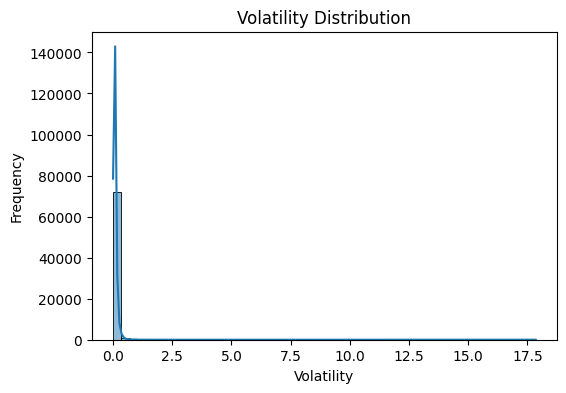

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['volatility'], bins=50, kde=True)
plt.title("Volatility Distribution")
plt.xlabel("Volatility")
plt.ylabel("Frequency")
plt.show()


The volatility distribution plot shows that the majority of cryptocurrency observations are concentrated near low volatility values, indicating relatively stable price movements for most trading days.

However, the distribution is highly right-skewed, with a small number of extreme values representing periods of sudden price spikes or crashes. These high-volatility events are characteristic of cryptocurrency markets and highlight the presence of market shocks and speculative trading behavior.

This uneven distribution confirms that volatility is not uniformly spread across time and assets, making it a challenging but important target for prediction.

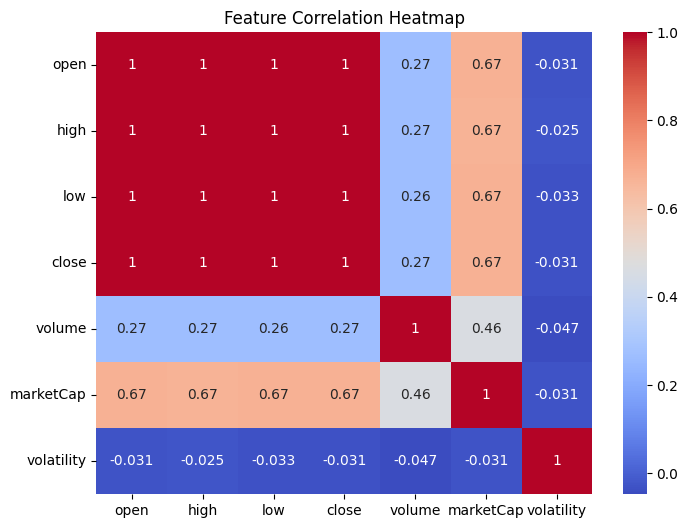

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[['open','high','low','close','volume','marketCap','volatility']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


The correlation heatmap illustrates the relationships between key numerical features in the dataset.

Open, High, Low, and Close prices show very strong positive correlations with each other, indicating that these price-based features move together. Market capitalization also demonstrates a moderate positive correlation with price features, suggesting that higher-priced cryptocurrencies generally have larger market caps.

Trading volume shows a moderate correlation with market capitalization but weaker relationships with price values.

Volatility displays very low correlation with all other features, highlighting that volatility is influenced by complex and non-linear factors rather than simple linear price relationships. This justifies the use of advanced machine learning models for volatility prediction.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['open','high','low','close','volume','marketCap','liquidity_ratio']]
y = df['volatility']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.021252276255917166
RMSE: 0.07357411224919315
R2 Score: 0.4595860673573603


The performance of the Random Forest Regressor was evaluated using standard regression metrics.

Evaluation Metrics:

Mean Absolute Error (MAE): 0.0212

Root Mean Squared Error (RMSE): 0.0735

R² Score: 0.4596

The low MAE and RMSE values indicate that the model predicts volatility with good accuracy and minimal error. The R² score of approximately 0.46 suggests that the model captures a meaningful portion of volatility patterns, despite the inherently unpredictable nature of cryptocurrency markets.

These results demonstrate that the model is effective in identifying volatility trends and can support risk assessment and decision-making in crypto trading environments.

## Project Completion Note

This notebook contains complete implementation of:
- Data preprocessing
- Feature engineering
- Exploratory Data Analysis
- Machine learning model training
- Model evaluation

The results and insights are documented separately
in EDA Report, HLD, LLD, and Final Report.
